In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv('ravdess_features.csv', skip_blank_lines=True)
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [22]:
df.describe()

,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.0,2452.0,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.0,48000.0,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.0,0.0,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.0,48000.0,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.0,48000.0,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.0,48000.0,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.0,48000.0,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,2.0,48000.0,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [24]:
#Valori nulli features
df.isna().sum() / len(df)

modality               0.000000
vocal_channel          0.079935
emotion                0.000000
emotional_intensity    0.000000
statement              0.000000
repetition             0.000000
actor                  0.459217
sex                    0.000000
channels               0.000000
sample_width           0.000000
frame_rate             0.000000
frame_width            0.000000
length_ms              0.000000
frame_count            0.000000
intensity              0.332790
zero_crossings_sum     0.000000
mfcc_mean              0.000000
mfcc_std               0.000000
mfcc_min               0.000000
mfcc_max               0.000000
sc_mean                0.000000
sc_std                 0.000000
sc_min                 0.000000
sc_max                 0.000000
sc_kur                 0.000000
sc_skew                0.000000
stft_mean              0.000000
stft_std               0.000000
stft_min               0.000000
stft_max               0.000000
stft_kur               0.000000
stft_ske

In [25]:
#Valori univoci per ogni features
df.nunique()

modality                  1
vocal_channel             2
emotion                   8
emotional_intensity       2
statement                 2
repetition                2
actor                    24
sex                       2
channels                  2
sample_width              1
frame_rate                1
frame_width               2
length_ms                95
frame_count             158
intensity               989
zero_crossings_sum     2176
mfcc_mean              2451
mfcc_std               2449
mfcc_min               2451
mfcc_max               2449
sc_mean                2451
sc_std                 2451
sc_min                 1431
sc_max                 2423
sc_kur                 2451
sc_skew                2451
stft_mean              2451
stft_std               2451
stft_min               1431
stft_max                  1
stft_kur               2451
stft_skew              2451
mean                   2450
std                    2451
min                    2148
max                 

#### Droppiamo le colonne con valore univoco come: modality, sample_width,frame_rate, stft_max. Droppiamo actor perché ha troppi valori null

In [26]:
df = df.drop(['modality','statement','sample_width','frame_rate', 'stft_max', 'actor'], axis=1)

In [27]:
df_col = df[['length_ms', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew']]
col = ['length_ms', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew']

# Assessing data quality (missing values, outliers)

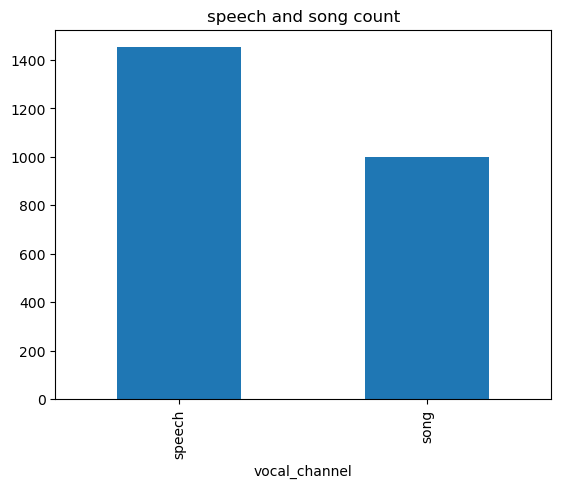

In [28]:
#we have fill vocal following the distribution of the data set 41% song and 59% Speech
def fill_vocal(row):
    if pd.isnull(row['vocal_channel']):
        return np.random.choice(['song', 'speech'], p=[0.41,0.59])
    else:
        return row['vocal_channel']
df['vocal_channel'] = df.apply(fill_vocal, axis=1)
df['vocal_channel'].value_counts().plot(kind='bar', title='speech and song count')
plt.show()

### Filling Intensity building a regression model

##### Non of this method of substitution were good enough to maintain the distrubution of original data
Use mean/mode/median
Estimate missing values using the probability distribution of existing values
Data Segmentation and using mean/mode/median of each segment
Data Segmentation and using the probability distribution within the segment

In [29]:
not_na_mask = ~df["intensity"].isna().values
na_mask = df["intensity"].isna().values
not_na_idxs = np.argwhere(not_na_mask).ravel()
na_idxs = np.argwhere(na_mask).ravel()
not_na_idxs

array([   0,    2,    3, ..., 2448, 2450, 2451], dtype=int64)

In [30]:
X_train = df[["zero_crossings_sum", "mfcc_mean"]].values
X_train = X_train[not_na_idxs]
X_train.shape

(1636, 2)

In [31]:
y_train = df["intensity"].values[not_na_idxs]
y_train.shape

(1636,)

In [32]:
X_test = df[["zero_crossings_sum", "mfcc_mean"]].values
X_test = X_test[na_idxs]
X_test.shape

(816, 2)

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = reg.predict(X_test)
y_pred.shape, y_pred

((816,),
 array([-37.4432349 , -37.83204989, -38.26008879, -37.9852539 ,
        -42.16393717, -43.84475885, -32.9933186 , -36.38114109,
        -39.76212778, -37.71677666, -36.48801225, -36.29905132,
        -33.12778002, -38.59386774, -46.48834128, -45.19118746,
        -39.23566061, -39.26396416, -38.51970779, -34.79602483,
        -37.231938  , -36.91981294, -31.49168316, -37.12414149,
        -41.58167282, -42.30837349, -36.63942022, -42.74910113,
        -39.4391702 , -37.99298476, -29.64762615, -32.7943543 ,
        -34.41906548, -32.25141332, -42.3407148 , -33.34181486,
        -39.27570734, -46.00284944, -31.95172824, -44.60014666,
        -29.80191135, -26.1557161 , -32.09496268, -41.60271488,
        -42.23595349, -39.89939275, -43.31451297, -44.34620108,
        -29.0817448 , -31.43707187, -33.57189713, -32.50876738,
        -37.26240038, -40.23572868, -32.88427765, -35.709648  ,
        -38.14198952, -35.42915209, -28.17786874, -37.2924768 ,
        -36.57758968, -32.98335

In [36]:
df['intensity'][na_idxs] = y_pred

C:\Users\anto_\AppData\Local\Temp\ipykernel_10808\2000266259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensity'][na_idxs] = y_pred


### Correlation after filling every column

In [37]:
pd.options.display.max_columns = None
df_corr = df_col.corr(numeric_only=True)
styled_corr = df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)
display(styled_corr)

,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
length_ms,1.00,0.29,0.33,0.01,-0.30,0.21,-0.35,-0.55,-0.18,-0.08,-0.12,0.29,0.62,-0.56,0.41,-0.25,-0.07,0.60,0.00,0.17,-0.07,0.07,-0.46,0.06
intensity,0.29,1.00,0.50,0.61,-0.98,0.97,-0.39,-0.33,-0.44,0.11,-0.22,0.37,0.42,-0.36,0.25,-0.28,-0.08,0.39,0.02,0.85,-0.81,0.81,-0.17,0.41
zero_crossings_sum,0.33,0.50,1.00,0.13,-0.56,0.50,-0.45,-0.07,-0.37,0.19,-0.04,0.19,0.14,-0.41,0.12,-0.20,0.07,0.45,0.02,0.47,-0.42,0.42,-0.12,0.20
mfcc_mean,0.01,0.61,0.13,1.00,-0.62,0.61,0.17,-0.28,-0.59,0.40,-0.38,0.36,0.25,0.31,-0.35,0.20,0.02,-0.19,0.01,0.57,-0.59,0.58,0.11,0.05
mfcc_std,-0.30,-0.98,-0.56,-0.62,1.00,-0.98,0.44,0.37,0.52,-0.13,0.23,-0.45,-0.47,0.37,-0.23,0.28,0.07,-0.41,-0.00,-0.84,0.82,-0.81,0.11,-0.36
mfcc_min,0.21,0.97,0.50,0.61,-0.98,1.00,-0.40,-0.29,-0.45,0.11,-0.19,0.37,0.36,-0.31,0.22,-0.28,-0.07,0.33,-0.01,0.84,-0.83,0.82,-0.01,0.39
mfcc_max,-0.35,-0.39,-0.45,0.17,0.44,-0.40,1.00,0.15,0.21,0.08,0.00,-0.25,-0.31,0.57,-0.50,0.38,0.01,-0.52,0.01,-0.38,0.34,-0.32,0.23,-0.09
sc_mean,-0.55,-0.33,-0.07,-0.28,0.37,-0.29,0.15,1.00,0.53,0.13,0.42,-0.63,-0.82,0.56,-0.32,0.18,-0.01,-0.64,-0.00,-0.22,0.17,-0.17,0.28,0.03
sc_std,-0.18,-0.44,-0.37,-0.59,0.52,-0.45,0.21,0.53,1.00,-0.45,0.59,-0.62,-0.40,0.09,0.20,-0.06,-0.23,-0.23,-0.02,-0.43,0.42,-0.41,-0.00,0.11
sc_min,-0.08,0.11,0.19,0.40,-0.13,0.11,0.08,0.13,-0.45,1.00,-0.24,0.02,-0.09,0.35,-0.43,0.36,0.11,-0.24,-0.01,0.16,-0.15,0.14,0.07,-0.16


## Finding Outliers with IQR method

In [38]:
# Calculate Q1 and Q3 for each column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))

# Count the number of potential outliers in each column
outlier_counts_before = outliers.sum()

# Display the count of potential outliers for each column
print(outlier_counts_before)

length_ms              11
intensity              18
zero_crossings_sum     52
mfcc_mean              12
mfcc_std                1
mfcc_min               14
mfcc_max                1
sc_mean                 5
sc_std                 30
sc_min                  0
sc_max                439
sc_kur                152
sc_skew                35
stft_mean               3
stft_std               33
stft_min              336
stft_kur               69
stft_skew              14
mean                  536
std                   172
min                   207
max                   207
kur                    85
skew                   32
dtype: int64


In [39]:
def prin_IQR(df, col):
# Calculate Q1 and Q3 for each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
# Calculate IQR for each column
    IQR = Q3 - Q1
# Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
# Count the number of potential outliers in each column
    outlier_counts = outliers.sum()
# Display the count of potential outliers for each column
    return outliers

In [40]:
def fill_outliers(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            continue
        x = df[column]
        q1 = np.quantile(x, 0.25)
        q3 = np.quantile(x, 0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Trova gli indici degli outlier
        outliers_idx = (x < lower_bound) | (x > upper_bound)

        # Sostituisci gli outlier con il valore della mediana
        #median = np.median(x)
        #df.loc[outliers_idx, column] = median

        # Genera nuovi valori casuali basati sulla distribuzione della serie x
        non_outliers = x[~outliers_idx]
        random_values = np.random.choice(non_outliers, sum(outliers_idx), replace=True)

        # Sostituisci gli outlier con i nuovi valori casuali
        df.loc[outliers_idx, column] = random_values

    return df

In [41]:
fill_outliers(df)

,vocal_channel,emotion,emotional_intensity,repetition,sex,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,2nd,F,1,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,11985.300650,-1.120769,0.250940,0.415250,0.335533,0.000000,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,1st,F,1,2,3904,187387.0,-37.443235,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.000000,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,2nd,F,1,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.000000,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,1st,F,1,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.000000,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,2nd,F,1,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.000000,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,1st,M,1,2,4605,221021.0,-42.136827,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,speech,calm,normal,1st,M,1,2,4171,200200.0,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,song,sad,strong,2nd,M,1,2,5239,251451.0,-37.919308,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,-1.473789,0.130310,6.530096e-08,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,speech,surprised,normal,1st,M,1,2,3737,179379.0,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,0.578854,0.308684,0.001565,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


In [42]:
# Calculate Q1 and Q3 for each column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))

# Count the number of potential outliers in each column
outlier_counts_after = outliers.sum()

# Display the count of potential outliers for each column
print(outlier_counts_after)

length_ms               0
intensity               6
zero_crossings_sum      7
mfcc_mean               0
mfcc_std                0
mfcc_min                2
mfcc_max                0
sc_mean                 0
sc_std                  7
sc_min                  0
sc_max                373
sc_kur                 65
sc_skew                 1
stft_mean               0
stft_std                4
stft_min              270
stft_kur               15
stft_skew               1
mean                  247
std                    87
min                   104
max                    85
kur                    12
skew                    4
dtype: int64


We have remove succesfully the amount of outliers we express below:

In [43]:
outlier_counts_before - outlier_counts_after

length_ms              11
intensity              12
zero_crossings_sum     45
mfcc_mean              12
mfcc_std                1
mfcc_min               12
mfcc_max                1
sc_mean                 5
sc_std                 23
sc_min                  0
sc_max                 66
sc_kur                 87
sc_skew                34
stft_mean               3
stft_std               29
stft_min               66
stft_kur               54
stft_skew              13
mean                  289
std                    85
min                   103
max                   122
kur                    73
skew                   28
dtype: int64

# Variables transformations

In [44]:
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
df['vocal_channel'] = df['vocal_channel'].map({'speech': 0, 'song': 1})
df['emotional_intensity'] = df['emotional_intensity'].map({'normal': 0, 'strong': 1})
df['repetition'] = df['repetition'].map({'1st': 1, '2nd': 2})
#Emozione dummies
pd.get_dummies(df['emotion']).astype(int)
#Aggiungere al dataframe
df = pd.concat([df, pd.get_dummies(df['emotion']).astype(int)], axis=1)

In [45]:
pd.options.display.max_columns = None
display(df)

,vocal_channel,emotion,emotional_intensity,repetition,sex,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,1,1,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,11985.300650,-1.120769,0.250940,0.415250,0.335533,0.000000,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,1,1,2,3904,187387.0,-37.443235,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.000000,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,happy,1,2,1,1,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.000000,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,1,1,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.000000,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,1,1,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.000000,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,calm,1,1,0,1,2,4605,221021.0,-42.136827,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247,0,1,0,0,0,0,0,0
2448,0,calm,0,1,0,1,2,4171,200200.0,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633,0,1,0,0,0,0,0,0
2449,1,sad,1,2,0,1,2,5239,251451.0,-37.919308,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,-1.473789,0.130310,6.530096e-08,0.015384,-0.093079,0.097260,4.964319,-0.005821,0,0,0,0,0,0,1,0
2450,0,surprised,0,1,0,1,2,3737,179379.0,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,0.578854,0.308684,0.001565,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966,0,0,0,0,0,0,0,1


In [46]:
df.to_pickle("./dataunderstanding.pkl")